In [2]:
import numpy as np
import cv2 as ocv
import scipy.stats as scs
import matplotlib.pyplot as plt

In [9]:
img_r = ocv.imread("./pup.jpg", ocv.IMREAD_GRAYSCALE)
#print(img_r)

img = np.ndarray.flatten(img_r)
start = 201
end = 300
print(img[start:end])

groupSize = 4096

#print(len(img))

img =  np.append(img, np.full(groupSize -  len(img) % groupSize, 0))

#print(len(img))

blocks = np.split(img, len(img) // groupSize)
#print(blocks)

dof = 128
alpha = 0.05

[104 104 104 104 104 104 104 102 103 103 103 103 102 101 100 100 100 100
  99  98  97  96  95  98  98  98  97  97  96  96  96  95  95  94  93  92
  92  91  90  91  91  90  89  88  88  87  87  87  87  86  86  86  85  85
  85  85  85  85  84  84  83  83  83  82  82  82  81  81  80  80  80  79
  79  79  78  78  77  77  77  72  73  74  74  75  74  74  74  73  73  73
  72  72  71  71  71  71  70  70  69]


In [66]:
def observed(lst):
    obs = []

    for i in range(0, len(lst) - 1):
        obs.append(lst[i]+1)

    return obs

In [67]:
def expected(lst):
    exp = []

    for i in range(0, len(lst) - 1, 2):
        exp.append((lst[i] + lst[i + 1]) / 2)

    return exp

In [90]:
def calcChiSquare(block, size, dof):
    #X = np.full(128, 0, dtype = 'float64')
    #Y = np.full(128, 0, dtype = 'float64')

    auxX = [0 for x in range(128)]  
    auxY = [0 for x in range(128)]

    for j in range(0, size):
        c = block[j]
        if(c % 2 == 0):
            auxX[c//2] += 1
        else:
            auxY[c//2] += 1
    
    #for i in range(0, 128): 
    #    print(f'{2 * i} : {X[i]}, {2 * i + 1} = {Y[i]}')

    #Z = (X + Y) / 2

    X = []
    # Y = []
    Z = []
    T = []

    auxZ = []
    for i in range(0, 128):
        if(auxX[i] + auxY[i] != 0):
            T.append(auxX[i])
            auxZ.append((auxX[i] + auxY[i])/2)

    # for i in range(0, 128):
    #     if(X[i] + Y[i] <= 4):
    #         X[i] = Y[i] = Z[i] = 0
    #         dof -= 1

    # for i in range(0, 128):
    #     if(auxX[i] + auxY[i] <= 4):
    #         dof -= 1
    #     else:
    #         Z.append(auxZ[i])
    #         X.append(auxX[i])
    #         Y.append(auxY[i])

    # chi = 0
    # for i in range(0, len(Z)):
    #     chi += (X[i] - Z[i])**2/Z[i]
    
    #p = 1 - scs.chi2.cdf(chi, dof - 1)

        
    sumX = sum(T)
    sumZ = sum(auxZ)

    X = [(x/sumX) for x in T]
    Z = [(x/sumZ) for x in auxZ]
    
    chi, p = scs.chisquare(X, Z)

    return p

In [92]:
img_r = ocv.imread("./stego_img_flwr.jpeg", ocv.IMREAD_GRAYSCALE)
img = np.ndarray.flatten(img_r)

arr_len = len(img)

In [93]:
p_values = []
for i in range(1, 101, 10):
    size = int(arr_len * i / 100)
    block = img[0:size]
    p_values.append(calcChiSquare(block, size, dof))

print(p_values)

[0.9999999956447146, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


In [53]:
print(len(p_values))

100


In [54]:
check = []
for i in range(len(p_values)):
    check.append(int(p_values[i]))

print(check)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [55]:
xAxis = [x for x in range(1,101)]
yAxis = p_values

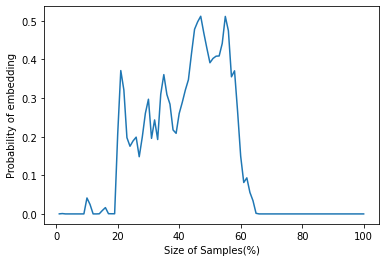

In [57]:
plt.plot(xAxis, yAxix)
plt.xlabel("Size of Samples(%)")
plt.ylabel("Probability of embedding")

plt.show()

In [4]:
#l = []
#for block in blocks:
#    p = calcChiSquare(block, groupSize, dof)

#    l.append(p)

#sum(l)/len(l)
toconsider = 0
for i in range(len(img)+1):
    
    toconsider = (0.1)*len(img)*(i+1)

calcChiSquare(blocks[0], groupSize, dof)

0 : 0.0, 1 = 0.0
2 : 0.0, 3 = 0.0
4 : 0.0, 5 = 0.0
6 : 0.0, 7 = 0.0
8 : 0.0, 9 = 0.0
10 : 0.0, 11 = 0.0
12 : 0.0, 13 = 0.0
14 : 0.0, 15 = 0.0
16 : 0.0, 17 = 0.0
18 : 0.0, 19 = 0.0
20 : 0.0, 21 = 0.0
22 : 0.0, 23 = 0.0
24 : 0.0, 25 = 0.0
26 : 0.0, 27 = 0.0
28 : 0.0, 29 = 0.0
30 : 0.0, 31 = 0.0
32 : 0.0, 33 = 0.0
34 : 0.0, 35 = 0.0
36 : 0.0, 37 = 0.0
38 : 0.0, 39 = 0.0
40 : 0.0, 41 = 0.0
42 : 0.0, 43 = 0.0
44 : 0.0, 45 = 0.0
46 : 0.0, 47 = 0.0
48 : 0.0, 49 = 0.0
50 : 0.0, 51 = 0.0
52 : 0.0, 53 = 0.0
54 : 0.0, 55 = 0.0
56 : 0.0, 57 = 0.0
58 : 0.0, 59 = 0.0
60 : 2.0, 61 = 23.0
62 : 25.0, 63 = 30.0
64 : 36.0, 65 = 31.0
66 : 44.0, 67 = 33.0
68 : 46.0, 69 = 40.0
70 : 33.0, 71 = 37.0
72 : 39.0, 73 = 42.0
74 : 43.0, 75 = 23.0
76 : 10.0, 77 = 21.0
78 : 43.0, 79 = 45.0
80 : 48.0, 81 = 30.0
82 : 40.0, 83 = 24.0
84 : 26.0, 85 = 36.0
86 : 29.0, 87 = 40.0
88 : 32.0, 89 = 42.0
90 : 48.0, 91 = 44.0
92 : 52.0, 93 = 46.0
94 : 46.0, 95 = 62.0
96 : 53.0, 97 = 65.0
98 : 81.0, 99 = 83.0
100 : 75.0, 101 = 73.

9.491895193725064e-06

In [5]:


# for i in range(0, img_height):
#     for j in range(0, img_width):
#         c = img[i, j]
#         if(img[i, j] % 2 == 0):
#             X[c//2] += 1
#         else:
#             Y[c//2] += 1

# chi = sum((X - Z)**2./Z)

# Z = (X + Y) / 2

# for i in range(0, 128):
#     if(X[i] + Y[i] <= 4):
#         X[i] = Y[i] = Z[i] = 0
#         dof -= 1

# criticalValue = scs.chi2.ppf(1 - alpha, dof)
# print(sum(X), sum(Z), dof, criticalValue)

# print(not (chi >= criticalValue))